SIERRALEONE

# 0. File Structure setup

In [66]:
import sys, pathlib
sys.path.append(str(pathlib.Path.cwd().parent / 'src'))
import importlib, solar_eda as eda
importlib.reload(eda)

RAW = "../data/raw/sierraleone.csv"
CLEAN = "../data/sierraleone_clean.csv"

# 1. Load & profile


In [67]:
df_raw = eda.load_raw(RAW)
desc, nulls = eda.profile(df_raw)
display(desc); display(nulls.sort_values(ascending=False).head())

,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-30 12:00:30.000000768,2021-10-30 00:01:00,2022-01-29 06:00:45,2022-04-30 12:00:30,2022-07-30 18:00:15,2022-10-30 00:00:00,NaN
GHI,525600.0,201.957515,-19.5,-2.8,0.3,362.4,1499.0,298.49515
DNI,525600.0,116.376337,-7.8,-0.3,-0.1,107.0,946.0,218.652659
DHI,525600.0,113.720571,-17.9,-3.8,-0.1,224.7,892.0,158.946032
ModA,525600.0,206.643095,0.0,0.0,3.6,359.5,1507.0,300.896893
ModB,525600.0,198.114691,0.0,0.0,3.4,345.4,1473.0,288.889073
Tamb,525600.0,26.319394,12.3,23.1,25.3,29.4,39.9,4.398605
RH,525600.0,79.448857,9.9,68.7,85.4,96.7,100.0,20.520775
WS,525600.0,1.146113,0.0,0.0,0.8,2.0,19.2,1.239248
WSgust,525600.0,1.691606,0.0,0.0,1.6,2.6,23.9,1.617053


Comments     100.0
GHI            0.0
Timestamp      0.0
DNI            0.0
DHI            0.0
dtype: float64

In [68]:
eda.dtype_summary(df_raw)


,dtype,non-null,missing,% missing,memory_mb
BP,int64,525600.0,0.0,0.0,4.01
Cleaning,int64,525600.0,0.0,0.0,4.01
Comments,float64,0.0,525600.0,1.0,4.01
DHI,float64,525600.0,0.0,0.0,4.01
DNI,float64,525600.0,0.0,0.0,4.01
GHI,float64,525600.0,0.0,0.0,4.01
ModA,float64,525600.0,0.0,0.0,4.01
ModB,float64,525600.0,0.0,0.0,4.01
RH,float64,525600.0,0.0,0.0,4.01
Precipitation,float64,525600.0,0.0,0.0,4.01


In [69]:
eda.numeric_overview(df_raw)


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600.000,.3f,.3f,.3f,.3f,.3f,.3f,nan
GHI,525600.000,201.958,-19.500,-2.800,0.300,362.400,1499.000,298.495
DNI,525600.000,116.376,-7.800,-0.300,-0.100,107.000,946.000,218.653
DHI,525600.000,113.721,-17.900,-3.800,-0.100,224.700,892.000,158.946
ModA,525600.000,206.643,0.000,0.000,3.600,359.500,1507.000,300.897
ModB,525600.000,198.115,0.000,0.000,3.400,345.400,1473.000,288.889
Tamb,525600.000,26.319,12.300,23.100,25.300,29.400,39.900,4.399
RH,525600.000,79.449,9.900,68.700,85.400,96.700,100.000,20.521
WS,525600.000,1.146,0.000,0.000,0.800,2.000,19.200,1.239
WSgust,525600.000,1.692,0.000,0.000,1.600,2.600,23.900,1.617


In [70]:
eda.cat_counts(df_raw, top=50)


{}

In [71]:
eda.missing_table(df_raw, mv_thresh=0.05)


,missing,% missing
Comments,525600,1.0


In [72]:
eda.dup_report(df_raw)


(np.int64(0),
 Empty DataFrame
 Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, Comments]
 Index: [])

# 2. Data Cleaning 

In [73]:
df_clean = eda.clean_solar_df(df_raw, save_path=CLEAN)

Dropping columns (≥100 % null): ['Comments']
Setting 264258 negative irradiance readings to 0 (night-time rows).
Dropped outliers: 16547
Saved cleaned dataframe → ../data/sierraleone_clean.csv


In [74]:
eda.dtype_summary(df_clean)


,dtype,non-null,missing,% missing,memory_mb
BP,int64,509053.0,0.0,0.0,3.884
Cleaning,int64,509053.0,0.0,0.0,3.884
DHI,float64,509053.0,0.0,0.0,3.884
DNI,float64,509053.0,0.0,0.0,3.884
GHI,float64,509053.0,0.0,0.0,3.884
HasRain,int64,509053.0,0.0,0.0,3.884
Index,NaN,NaN,NaN,NaN,3.884
ModA,float64,509053.0,0.0,0.0,3.884
ModB,float64,509053.0,0.0,0.0,3.884
Precipitation,float64,509053.0,0.0,0.0,3.884


In [75]:
eda.numeric_overview(df_clean)


,count,mean,min,25%,50%,75%,max,std
Timestamp,509053.000,.3f,.3f,.3f,.3f,.3f,.3f,nan
GHI,509053.000,187.214,-5.400,0.000,0.000,330.500,1094.000,277.017
DNI,509053.000,104.197,-5.000,0.000,0.000,74.400,772.200,200.832
DHI,509053.000,110.503,-5.200,0.000,0.000,217.600,587.300,151.445
ModA,509053.000,189.482,0.000,0.000,1.200,326.500,1105.000,281.653
ModB,509053.000,181.419,0.000,0.000,1.100,313.900,1064.000,269.752
Tamb,509053.000,26.213,12.300,23.100,25.100,29.200,39.900,4.398
RH,509053.000,79.750,9.900,69.000,86.100,97.000,100.000,20.560
WS,509053.000,1.090,0.000,0.000,0.800,1.900,4.800,1.155
WSgust,509053.000,1.614,0.000,0.000,1.400,2.600,6.400,1.503


In [76]:
eda.cat_counts(df_clean, top=50)


{}

In [77]:
eda.missing_table(df_clean, mv_thresh=0.05)


,missing,% missing


In [78]:
eda.dup_report(df_clean)


(np.int64(0),
 Empty DataFrame
 Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, HasRain, Hour, Month]
 Index: []
 
 [0 rows x 21 columns])

# 3. Visualzations


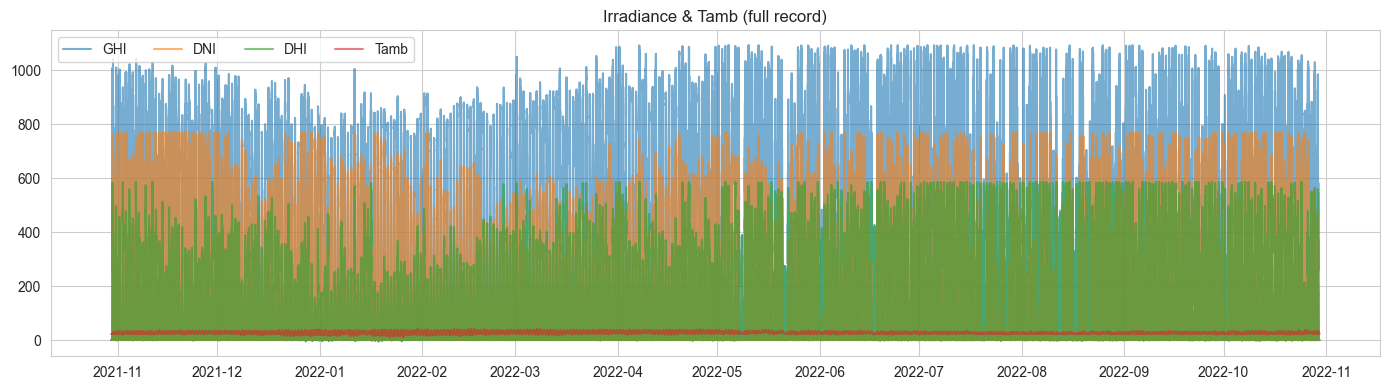

In [79]:
import matplotlib.pyplot as plt
eda.line_overview(df_clean); plt.show()

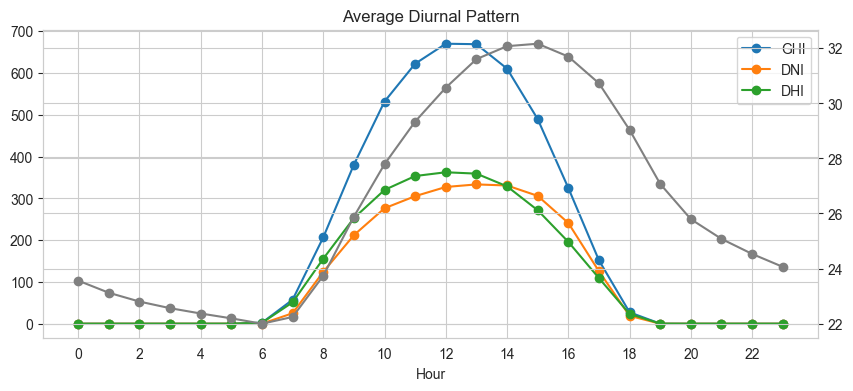

In [80]:
eda.diurnal_curve(df_clean); plt.show()


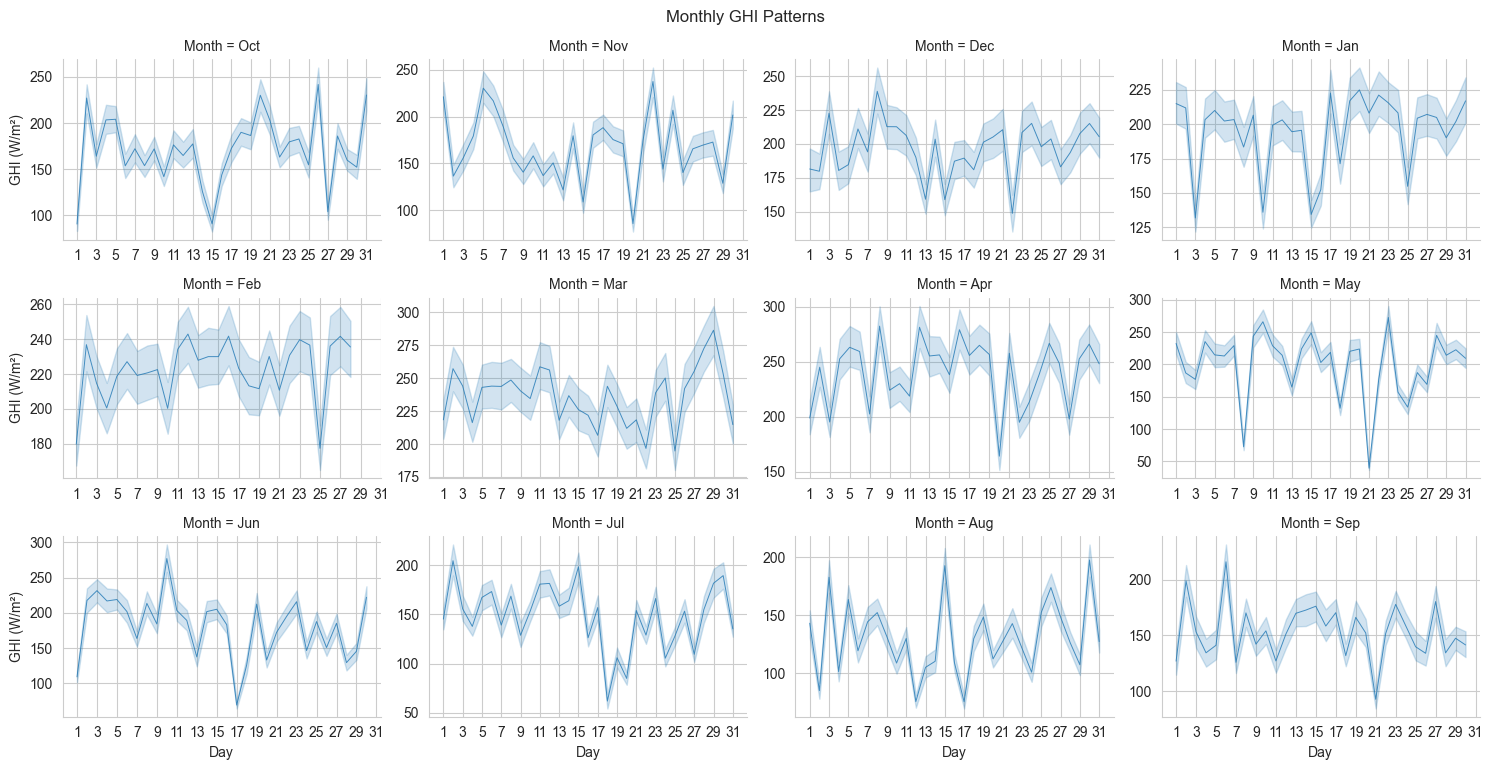

In [81]:
eda.monthly_facets(df_clean); plt.show()

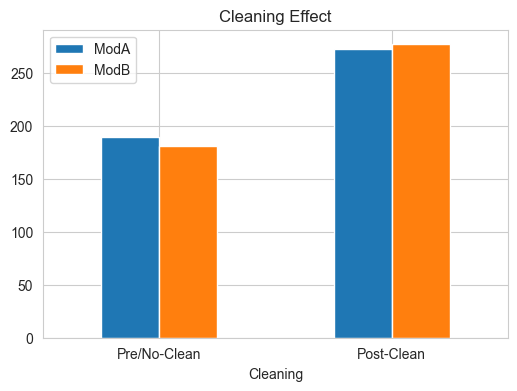

,ModA,ModB
Cleaning,,
Pre/No-Clean,189.4,181.3
Post-Clean,273.3,277.2


In [82]:
ax, impact = eda.cleaning_impact(df_clean); plt.show(); display(impact)


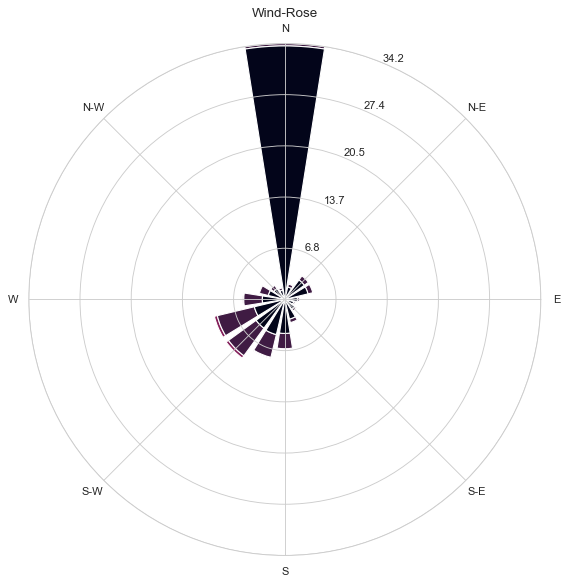

In [83]:
eda.wind_rose(df_clean); plt.show()


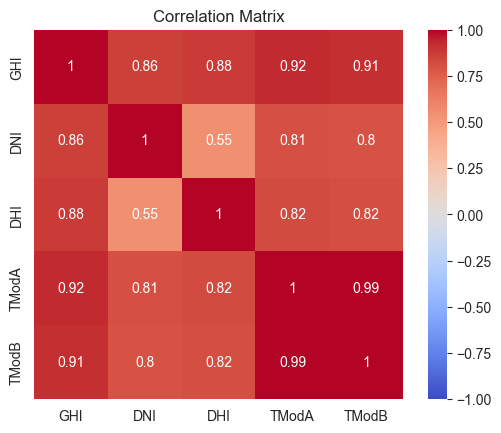

In [84]:
eda.corr_heatmap(df_clean); plt.show()


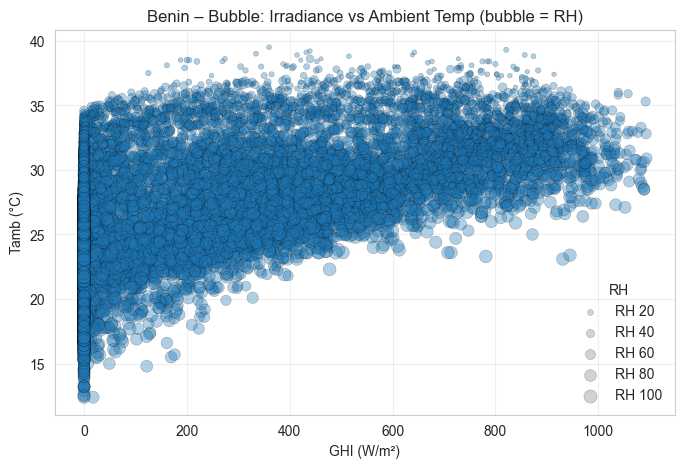

In [ ]:
ax = eda.bubble_ghi_tamb(
    df_clean,        
    size_col="RH",      
    n=20_000,           
    size_scale=0.9,
    title="Benin – Bubble: Irradiance vs Ambient Temp (bubble = RH)"
)
plt.show()